<a href="https://colab.research.google.com/github/pdwu0817/music-genres-classifier/blob/main/music_genres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import aitk libraries

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/PythonLib/aitk/')
from aitk.utils import gallery, array_to_image
from networks import Network

In [ ]:
import numpy as np 
import pandas as pd 

from tensorflow import keras
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
import os
from random import shuffle
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

import PIL
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle/'

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
os.chdir('/content/drive/MyDrive/Kaggle')
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

gtzan-dataset-music-genre-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
zip_path = '/content/gdrive/MyDrive/kaggle/gtzan-dataset-music-genre-classification.zip'
os.getcwd()
!cp '{zip_path}' .
!unzip -q 'gtzan-dataset-music-genre-classification.zip'
os.listdir()

cp: cannot stat '/content/gdrive/MyDrive/kaggle/gtzan-dataset-music-genre-classification.zip': Transport endpoint is not connected
replace Data/features_30_sec.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

['kaggle.json', 'gtzan-dataset-music-genre-classification.zip', 'Data']

In [ ]:
directory = "/content/drive/MyDrive/Kaggle/Data/images_original/"

x = list()
y = list()
imgLst = []
genres = ["blues", "classical", "country", "disco", "hiphop","jazz","metal","pop", "reggae", "rock"]
for g in genres:
    sub = directory + g + "/"
    allFiles = os.listdir(sub)
    label = genres.index(g)
    for file in allFiles:
        img = load_img(sub + "/" + file)
        imgLst.append(img)
        img_arr = img_to_array(img)
        shape = img_arr.shape # the shape does not change
        x.append(img_arr)
        y.append(label)

x = np.array(x)
y = np.array(y)
        
print(len(x))
print(len(y))

999
999


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


In [ ]:
x_train.shape

(599, 288, 432, 3)

In [ ]:
x_test.shape

(400, 288, 432, 3)

0,1,2,3,4
5,6,7,8,9
10,11,12,13,14
15,16,17,18,19

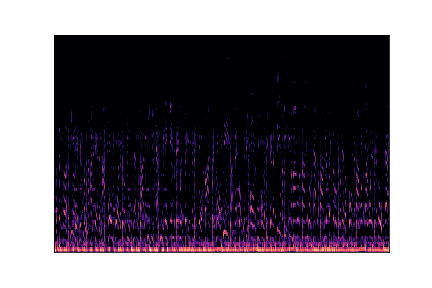
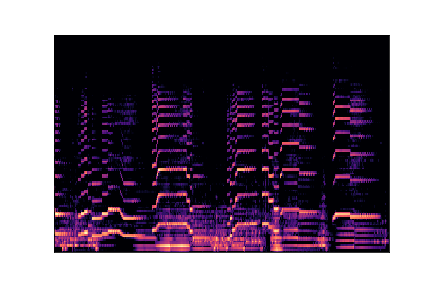
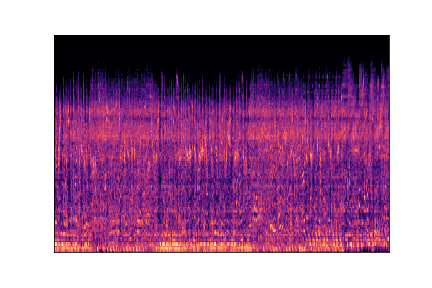
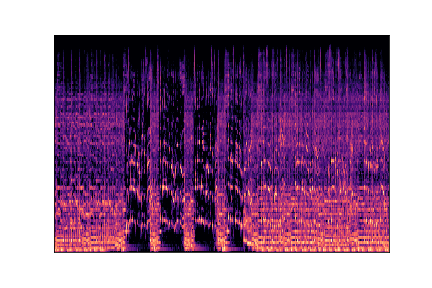
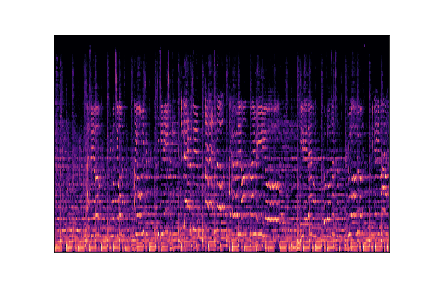
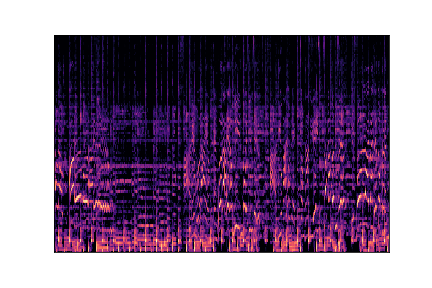
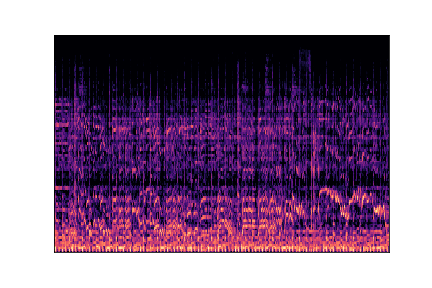
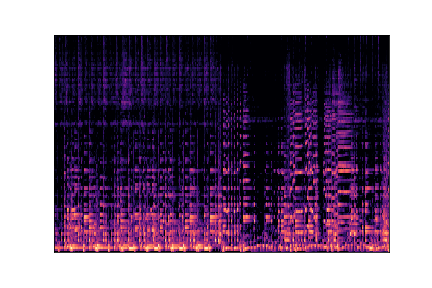
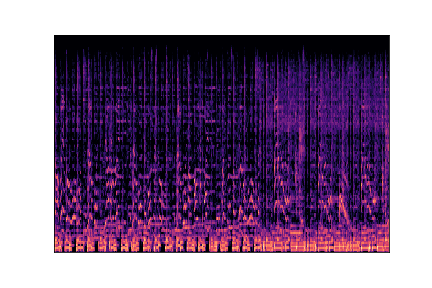
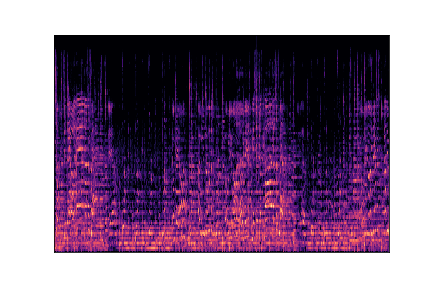
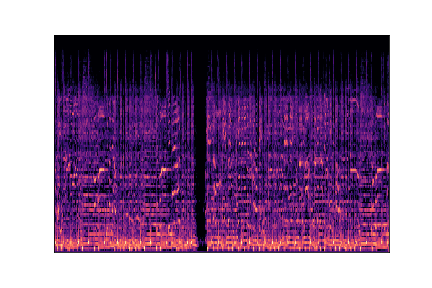
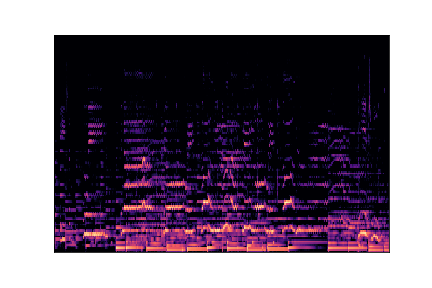
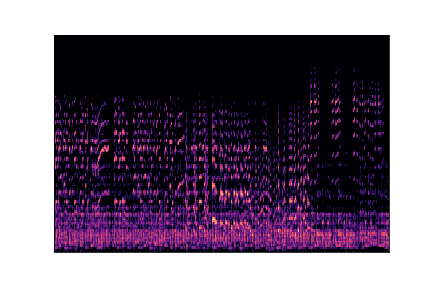
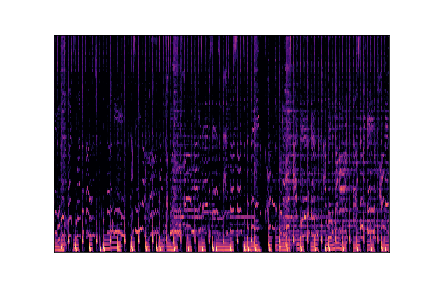
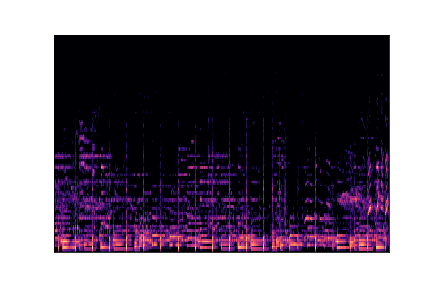
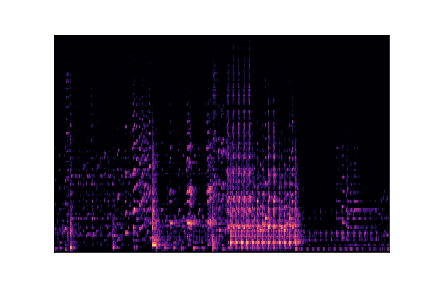
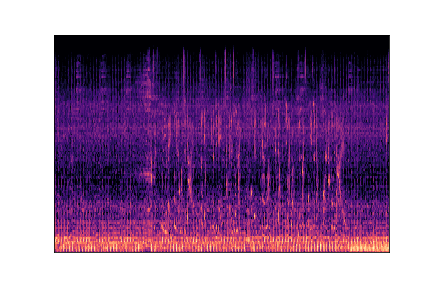
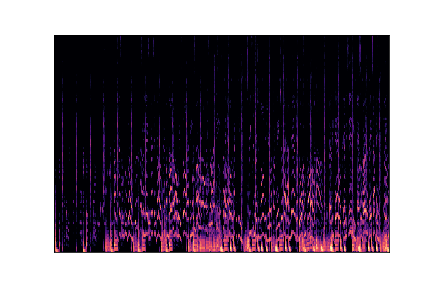
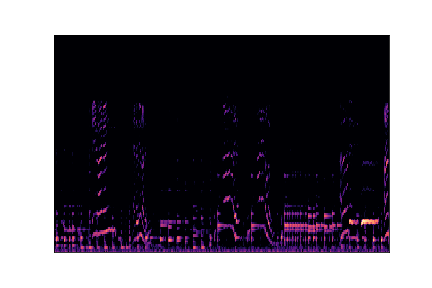
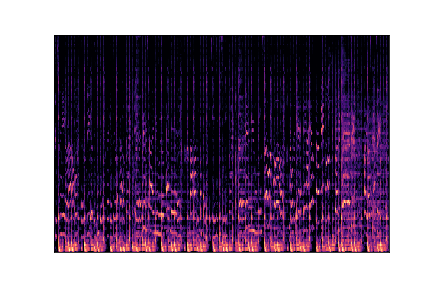

In [ ]:
images = [array_to_image(x_train[i]) for i in range(20)]
gallery(images)

In [ ]:
y_train[:20]

array([4, 5, 6, 6, 9, 3, 0, 5, 6, 9, 6, 2, 5, 7, 8, 5, 6, 4, 0, 7])

In [ ]:
y_train_category = to_categorical(y_train)

y_test_category = to_categorical(y_test)


In [ ]:
y_train_category[0] # should show "1." in index 4, meaning that the first track belongs to genre label 4, hip hop

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_train_category[12] # should show "1." in index 5, meaning that the twelfth track belongs to genre label 5, jazz

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
cnn = models.Sequential()
cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=shape))
# cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=(288, 432, 3)))
cnn.add(Conv2D(8,(3,3),activation="relu")) # added second convolutional layer
# cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(5,(3,3),activation="relu")) # added third convolutional layer
cnn.add(MaxPooling2D(pool_size=(2,2))) # added second pooling layer
cnn.add(Flatten())
cnn.add(Dense(100, activation='relu')) # added new dense layer
cnn.add(Dense(10, activation='relu'))

cnn.add(Dense(10, activation='sigmoid'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 286, 430, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 284, 428, 8)       4616      
                                                                 
 conv2d_2 (Conv2D)           (None, 282, 426, 5)       365       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 141, 213, 5)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 150165)            0         
                                                                 
 dense (Dense)               (None, 100)               15016600  
                                                        

In [ ]:
cnn.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
net = Network(cnn)

history = net.fit(x_train, 
                  y_train_category, 
                  verbose=1,
                  validation_data=(x_test, 
                                   y_test_category),
                  batch_size = 64,
                  epochs=10)



Epoch 10/10 loss: 2.3024072647094727 - accuracy: 0.10517529398202896 - val_loss: 2.3029890060424805 - val_accuracy: 0.0925000011920929
